#24 Nov 2024
## Sentiment analysis
needs to be done after lexical and synctactic part


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Load the data
df = pd.read_csv('/content/vaccination_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
# Structural analysis of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [ ]:
# looking at overall data columns
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
id,0
user_name,0
user_location,2270
user_description,680
user_created,0
user_followers,0
user_friends,0
user_favourites,0
user_verified,0
date,0


In [ ]:
# EDA
## To Do

In [ ]:
# Text analytics

# Drop all columns except text data
text_df = df['text']
text_df.head()

,text
0,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm"
2,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
3,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4"
4,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq


In [ ]:
# make full width column
pd.set_option('display.max_colwidth', None)
text_df.head()

,text
0,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm"
2,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
3,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4"
4,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq


In [ ]:
type(text_df)

pandas.core.series.Series

In [ ]:
text_df = text_df.to_frame()
text_df.head()

,text
0,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm"
2,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
3,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4"
4,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq


In [ ]:
type(text_df)

pandas.core.frame.DataFrame

In [ ]:
for i in range(10):
  print(text_df.iloc[i],'\n')

text    Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
Name: 0, dtype: object 

text    While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm
Name: 1, dtype: object 

text    #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
Name: 2, dtype: object 

text    Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4
Name: 3, dtype: object 

text    Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq
Name: 4, dtype: object 

text    Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… https://t.co/EifsyQoeKN
Name: 5, dtype: object 

text    it is a 

In [ ]:
## Data Preprocessing

# 1.make sure all are in lowercase letters
# 2.take away all data parts with hyperlinks
# 3.how many values with @ or # to it

In [ ]:
# define a function to do following - lower,remove hyperlink,remove @tagging,#tags

In [ ]:
def data_preprocessing(text):
  # remove hyperlinks
  filtered_text = re.sub(r'https?: //\S+|www\.\S+', '', text)

  # remove @ tagging
  filtered_text = re.sub(r'@\w+', '', filtered_text)

  # remove # tagging
  filtered_text = re.sub(r'#', '', filtered_text)

  # anything which is not a word i removed
  filtered_text = re.sub(r'[^\w\s]','',filtered_text)

   #lower case
  filtered_text = filtered_text.lower()

  # tokenization
  filtered_text = word_tokenize(filtered_text)

  # remove stopwords
  filtered_text = [word for word in filtered_text if word not in stop_words]

  filtered_text = ' '.join(filtered_text)

  return filtered_text

In [ ]:
text_df['text'] = text_df['text'].astype(str).apply(data_preprocessing)

# Display cleaned data
print(text_df['text'])

0                                             folks said daikon paste could treat cytokine storm pfizerbiontech httpstcoxehhimg1kf
1                                    world wrong side history year hopefully biggest vaccination effort weve ev httpstcodlchrzjkhm
2        coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years httpstcoieylckbr8p
3                                 facts immutable senator even youre ethically sturdy enough acknowledge 1 born httpstcojqgv18kch4
4                                                  explain need vaccine whereareallthesickpeople pfizerbiontech httpstcokxbsrobehq
                                                                   ...                                                            
11015                   number covid19 cases today 17 november 2021 remember observe safety protective measures httpstcocvqxvvyusg
11016                                                                              

In [ ]:
# remove duplicates

text_df.drop_duplicates(inplace=True)
text_df.shape

(10974, 1)

In [ ]:
# Stemming and lemmatization

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming(text):
    if isinstance(text, str):
        text = text.split()  # Tokenize if it's a string
    elif not isinstance(text, list):
        return ''  # Return empty string for invalid input

    stemmed_text = [stemmer.stem(word) for word in text]
    return ' '.join(stemmed_text)  # Join the stemmed words back into a string

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    if isinstance(text, str):
        text = text.split()  # Tokenize if it's a string
    elif not isinstance(text, list):
        return ''  # Return empty string for invalid input

    lemmatized_text = []

    for word in text:
        # You can specify POS (part of speech) for better lemmatization
        pos = wordnet.VERB if word.endswith('ing') else wordnet.NOUN  # Simple heuristic; adjust as needed
        lemmatized_text.append(lemmatizer.lemmatize(word, pos))

    return ' '.join(lemmatized_text)  # Join the lemmatized words back into a string

In [ ]:
# Assuming 'text' is a column in your DataFrame
text_df['stemmed_text'] = text_df['text'].apply(stemming)
text_df['stemmed_text']

,stemmed_text
0,folk said daikon past could treat cytokin storm pfizerbiontech httpstcoxehhimg1kf
1,world wrong side histori year hope biggest vaccin effort weve ev httpstcodlchrzjkhm
2,coronaviru sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccin creat last 24 year httpstcoieylckbr8p
3,fact immut senat even your ethic sturdi enough acknowledg 1 born httpstcojqgv18kch4
4,explain need vaccin whereareallthesickpeopl pfizerbiontech httpstcokxbsrobehq
...,...
11014,alreadi 3rd pfizerbiontech last month dubai uae
11015,number covid19 case today 17 novemb 2021 rememb observ safeti protect measur httpstcocvqxvvyusg
11017,number covid19 case today 16 novemb 2021 rememb observ safeti protect measur httpstcoqztn42ttop
11018,pfizerbiontech develop new pill paxlovid increas chang surviv diseas covid19 httpstcoavvicgxpzu


In [ ]:
# Assuming 'text' is a column in your DataFrame and it's already tokenized
# If the text is not tokenized, you might want to tokenize it first
text_df['lemmatized_text'] = text_df['text'].apply(lambda x: lemmatization(x.split()))
text_df['lemmatized_text']

,lemmatized_text
0,folk said daikon paste could treat cytokine storm pfizerbiontech httpstcoxehhimg1kf
1,world wrong side history year hopefully biggest vaccination effort weve ev httpstcodlchrzjkhm
2,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 year httpstcoieylckbr8p
3,fact immutable senator even youre ethically sturdy enough acknowledge 1 born httpstcojqgv18kch4
4,explain need vaccine whereareallthesickpeople pfizerbiontech httpstcokxbsrobehq
...,...
11014,already 3rd pfizerbiontech last month dubai uae
11015,number covid19 case today 17 november 2021 remember observe safety protective measure httpstcocvqxvvyusg
11017,number covid19 case today 16 november 2021 remember observe safety protective measure httpstcoqztn42ttop
11018,pfizerbiontech developed new pill paxlovid increased change survive diseased covid19 httpstcoavvicgxpzu


In [ ]:
# pos tagging , dependency parsing and lemma using spacy
import spacy
nlp = spacy.load('en_core_web_sm')

# Iterate over the 'text' column of the DataFrame
for text in text_df['text']:
  doc = nlp(text)
  for token in doc:
    print(token.text, token.pos_, token.dep_, token.lemma_)


Streaming output truncated to the last 5000 lines.
praying VERB xcomp pray
good ADJ amod good
health NOUN compound health
year NOUN compound year
metal NOUN compound metal
ox NOUN dative ox
pfizerbiontech NOUN dobj pfizerbiontech
like ADP prep like
term NOUN compound term
pregnancy NOUN nsubj pregnancy
delivered VERB ROOT deliver
9months NUM nummod 9months
jubilee PROPN compound jubilee
sonkoundersiege NOUN compound sonkoundersiege
pfizerbiontech NOUN dobj pfizerbiontech
afp PROPN compound afp
israels NOUN compound israel
largest ADJ amod large
healthcare NOUN compound healthcare
provider NOUN nsubj provider
said VERB ROOT say
sunday PROPN compound sunday
study NOUN dobj study
half NOUN compound half
million NUM nummod million
httpstcodsdmeqzo5 NOUN npadvmod httpstcodsdmeqzo5
m NOUN punct m
canada PROPN nmod canada
way NOUN npadvmod way
38th ADJ amod 38th
vaccine NOUN nsubj vaccine
new ADJ amod new
metric ADJ amod metric
invent NOUN nsubj invent
distract NOUN ROOT distract
us PRON dobj

KeyboardInterrupt: 

In [ ]:
# bow model
cv = CountVectorizer()
bow = cv.fit_transform(text_df['text'])
bow.shape

(10974, 24596)

In [ ]:
# print the top 20 most frequent tokens

# will do later

In [ ]:
# SEntiment analysis

from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
# define a function for sentiment labelling -positive and negative

text_df['polarity'] = text_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
text_df.head(20)

,text,stemmed_text,lemmatized_text,polarity
0,folks said daikon paste could treat cytokine storm pfizerbiontech httpstcoxehhimg1kf,folk said daikon past could treat cytokin storm pfizerbiontech httpstcoxehhimg1kf,folk said daikon paste could treat cytokine storm pfizerbiontech httpstcoxehhimg1kf,0.000000
1,world wrong side history year hopefully biggest vaccination effort weve ev httpstcodlchrzjkhm,world wrong side histori year hope biggest vaccin effort weve ev httpstcodlchrzjkhm,world wrong side history year hopefully biggest vaccination effort weve ev httpstcodlchrzjkhm,-0.500000
2,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years httpstcoieylckbr8p,coronaviru sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccin creat last 24 year httpstcoieylckbr8p,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 year httpstcoieylckbr8p,0.000000
3,facts immutable senator even youre ethically sturdy enough acknowledge 1 born httpstcojqgv18kch4,fact immut senat even your ethic sturdi enough acknowledg 1 born httpstcojqgv18kch4,fact immutable senator even youre ethically sturdy enough acknowledge 1 born httpstcojqgv18kch4,0.100000
4,explain need vaccine whereareallthesickpeople pfizerbiontech httpstcokxbsrobehq,explain need vaccin whereareallthesickpeopl pfizerbiontech httpstcokxbsrobehq,explain need vaccine whereareallthesickpeople pfizerbiontech httpstcokxbsrobehq,0.000000
5,anyone useful adviceguidance whether covid vaccine safe whilst breastfeeding httpstcoeifsyqoekn,anyon use adviceguid whether covid vaccin safe whilst breastfeed httpstcoeifsyqoekn,anyone useful adviceguidance whether covid vaccine safe whilst breastfeed httpstcoeifsyqoekn,0.400000
6,bit sad claim fame success vaccination patriotic competition usa canada uk httpstcoifmraygytp,bit sad claim fame success vaccin patriot competit usa canada uk httpstcoifmraygytp,bit sad claim fame success vaccination patriotic competition usa canada uk httpstcoifmraygytp,-0.100000
7,many bright days 2020 best 1 bidenharris winning election2020 httpstco77u4f8xxfx,mani bright day 2020 best 1 bidenharri win election2020 httpstco77u4f8xxfx,many bright day 2020 best 1 bidenharris win election2020 httpstco77u4f8xxfx,0.675000
8,covid vaccine getting covidvaccine covid19 pfizerbiontech moderna,covid vaccin get covidvaccin covid19 pfizerbiontech moderna,covid vaccine get covidvaccine covid19 pfizerbiontech moderna,0.000000
9,covidvaccine states start getting covid19vaccine monday us says pakustv nyc healthcare globalgoals httpstcomksovbvs5w,covidvaccin state start get covid19vaccin monday us say pakustv nyc healthcar globalgo httpstcomksovbvs5w,covidvaccine state start get covid19vaccine monday u say pakustv nyc healthcare globalgoals httpstcomksovbvs5w,0.000000


In [ ]:
# define the sentiment label
def sentiment_label(polarity):
  if polarity > 0:
    return 'positive'
  elif polarity < 0:
    return 'negative'
  else:
    return 'neutral'

In [ ]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment_label)
text_df.head(20)

,text,stemmed_text,lemmatized_text,polarity,sentiment
0,folks said daikon paste could treat cytokine storm pfizerbiontech httpstcoxehhimg1kf,folk said daikon past could treat cytokin storm pfizerbiontech httpstcoxehhimg1kf,folk said daikon paste could treat cytokine storm pfizerbiontech httpstcoxehhimg1kf,0.000000,neutral
1,world wrong side history year hopefully biggest vaccination effort weve ev httpstcodlchrzjkhm,world wrong side histori year hope biggest vaccin effort weve ev httpstcodlchrzjkhm,world wrong side history year hopefully biggest vaccination effort weve ev httpstcodlchrzjkhm,-0.500000,negative
2,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years httpstcoieylckbr8p,coronaviru sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccin creat last 24 year httpstcoieylckbr8p,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 year httpstcoieylckbr8p,0.000000,neutral
3,facts immutable senator even youre ethically sturdy enough acknowledge 1 born httpstcojqgv18kch4,fact immut senat even your ethic sturdi enough acknowledg 1 born httpstcojqgv18kch4,fact immutable senator even youre ethically sturdy enough acknowledge 1 born httpstcojqgv18kch4,0.100000,positive
4,explain need vaccine whereareallthesickpeople pfizerbiontech httpstcokxbsrobehq,explain need vaccin whereareallthesickpeopl pfizerbiontech httpstcokxbsrobehq,explain need vaccine whereareallthesickpeople pfizerbiontech httpstcokxbsrobehq,0.000000,neutral
5,anyone useful adviceguidance whether covid vaccine safe whilst breastfeeding httpstcoeifsyqoekn,anyon use adviceguid whether covid vaccin safe whilst breastfeed httpstcoeifsyqoekn,anyone useful adviceguidance whether covid vaccine safe whilst breastfeed httpstcoeifsyqoekn,0.400000,positive
6,bit sad claim fame success vaccination patriotic competition usa canada uk httpstcoifmraygytp,bit sad claim fame success vaccin patriot competit usa canada uk httpstcoifmraygytp,bit sad claim fame success vaccination patriotic competition usa canada uk httpstcoifmraygytp,-0.100000,negative
7,many bright days 2020 best 1 bidenharris winning election2020 httpstco77u4f8xxfx,mani bright day 2020 best 1 bidenharri win election2020 httpstco77u4f8xxfx,many bright day 2020 best 1 bidenharris win election2020 httpstco77u4f8xxfx,0.675000,positive
8,covid vaccine getting covidvaccine covid19 pfizerbiontech moderna,covid vaccin get covidvaccin covid19 pfizerbiontech moderna,covid vaccine get covidvaccine covid19 pfizerbiontech moderna,0.000000,neutral
9,covidvaccine states start getting covid19vaccine monday us says pakustv nyc healthcare globalgoals httpstcomksovbvs5w,covidvaccin state start get covid19vaccin monday us say pakustv nyc healthcar globalgo httpstcomksovbvs5w,covidvaccine state start get covid19vaccine monday u say pakustv nyc healthcare globalgoals httpstcomksovbvs5w,0.000000,neutral


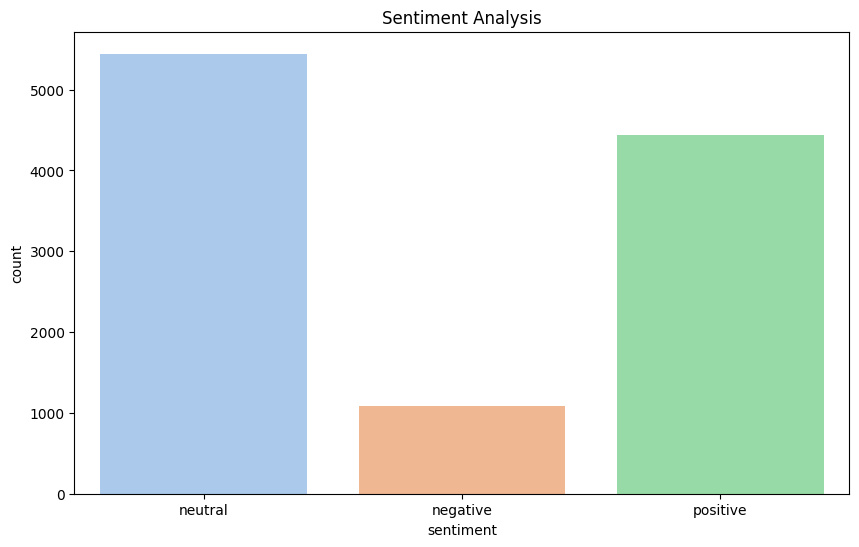

In [ ]:
# visualise the results
sentiment_order = sorted(text_df['sentiment'].unique())
sentiment_order
plt.figure(figsize=(10,6))
sns.countplot(x='sentiment',data=text_df,palette = 'pastel')
plt.title('Sentiment Analysis')
plt.show()

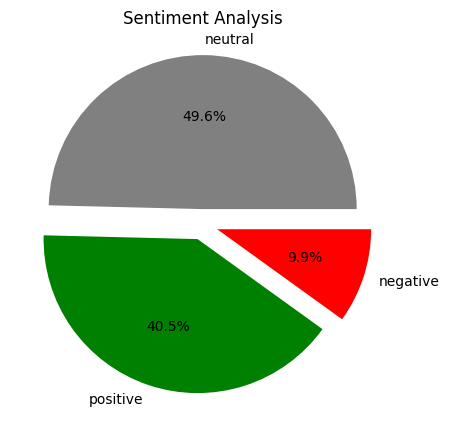

In [ ]:
plt.figure(figsize=(5,5))
colors = ('grey','green','red')
explode = (0.1,0.1,0.1)
tags = text_df['sentiment'].value_counts()
plt.pie(tags,labels=tags.index,autopct='%1.1f%%',colors=colors,explode=explode)
plt.title('Sentiment Analysis')
plt.show()

In [ ]:
#Topic Modelling

pos_tweets = text_df[text_df['sentiment'] == 'positive']
pos_tweets = pos_tweets.sort_values('polarity',ascending=False)


pos_tweets.head()

,text,stemmed_text,lemmatized_text,polarity,sentiment
3788,saw awesome comparison pfizer vaccine vs moderna vaccine covid httpstcoaxktyjqdgq,saw awesom comparison pfizer vaccin vs moderna vaccin covid httpstcoaxktyjqdgq,saw awesome comparison pfizer vaccine v moderna vaccine covid httpstcoaxktyjqdgq,1.0,positive
8924,excellent point considering longevity immune response post covid19 infection 8 months httpstcosxjkmxkmdx,excel point consid longev immun respons post covid19 infect 8 month httpstcosxjkmxkmdx,excellent point consider longevity immune response post covid19 infection 8 month httpstcosxjkmxkmdx,1.0,positive
7470,wonderful news pfizerbiontech covidvaccine httpstco7tagsyegih,wonder news pfizerbiontech covidvaccin httpstco7tagsyegih,wonderful news pfizerbiontech covidvaccine httpstco7tagsyegih,1.0,positive
9216,despite israel pfizerbiontech vaccine considered best johnson amp httpstcoarn6osbzhz,despit israel pfizerbiontech vaccin consid best johnson amp httpstcoarn6osbzhz,despite israel pfizerbiontech vaccine considered best johnson amp httpstcoarn6osbzhz,1.0,positive
3282,truly wonderful news covid19 pfizerbiontech httpstcovvvum4d4xq,truli wonder news covid19 pfizerbiontech httpstcovvvum4d4xq,truly wonderful news covid19 pfizerbiontech httpstcovvvum4d4xq,1.0,positive


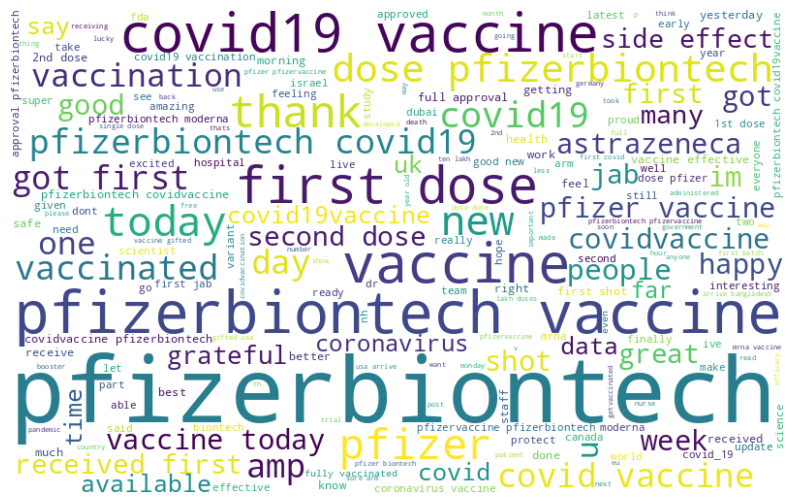

In [ ]:
# wordcloud for positive tweets
sns.set_style('darkgrid')
pos_tweets_text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(10,10))
wordcloud = WordCloud(width=800,height=500,background_color='white', random_state=21,max_font_size=110).generate(pos_tweets_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Topic Modelling

neg_tweets = text_df[text_df['sentiment'] == 'negative']
neg_tweets = neg_tweets.sort_values('polarity',ascending=False)


neg_tweets.head()

,text,stemmed_text,lemmatized_text,polarity,sentiment
2912,work skilled nursing facility got first vaccine far less painful flu vaccin httpstco6ri7eiowlr,work skill nurs facil got first vaccin far less pain flu vaccin httpstco6ri7eiowlr,work skilled nurse facility got first vaccine far less painful flu vaccin httpstco6ri7eiowlr,-0.003333,negative
7256,200321 752308 vaccinations new daily record daily vaccination numbers rolling 7 day average httpstcopdccnvfrqv,200321 752308 vaccin new daili record daili vaccin number roll 7 day averag httpstcopdccnvfrqv,200321 752308 vaccination new daily record daily vaccination number roll 7 day average httpstcopdccnvfrqv,-0.003409,negative
2073,ukgovernment cant even vaccinate properly ethically get right kinds wrong httpstco4acvvvsx2v,ukgovern cant even vaccin properli ethic get right kind wrong httpstco4acvvvsx2v,ukgovernment cant even vaccinate properly ethically get right kind wrong httpstco4acvvvsx2v,-0.004762,negative
7715,got first dose less waiting time airport vaccination center pain side effects httpstcotlexsltopj,got first dose less wait time airport vaccin center pain side effect httpstcotlexsltopj,got first dose less wait time airport vaccination center pain side effect httpstcotlexsltopj,-0.005556,negative
7157,second dose due end next month well far pfizerbiontech,second dose due end next month well far pfizerbiontech,second dose due end next month well far pfizerbiontech,-0.006250,negative


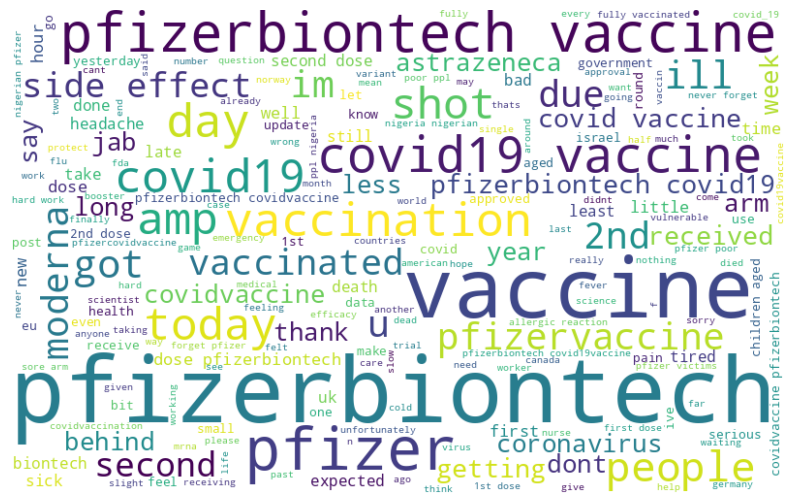

In [ ]:
# wordcloud for negative tweets
sns.set_style('darkgrid')
neg_tweets_text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(10,10))
wordcloud = WordCloud(width=800,height=500,background_color='white', random_state=21,max_font_size=110).generate(neg_tweets_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()